In [13]:
import pandas as pd 
import numpy as np 

In [14]:
df=pd.read_csv('data_clust.csv',header=None)

In [15]:
df.shape

(12060, 300)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-2.20243,-0.574106,-6.78421,-2.43637,-2.28676,-1.061320,-1.396050,-6.18320,-6.93734,-6.75859,...,-6.66383,-5.69793,-6.76522,-6.14721,-6.92017,-6.38389,-6.08320,-6.74807,-6.12753,-6.09497
1,-1.78500,-0.444601,-6.08639,-2.31255,-1.46379,-0.451503,-1.108550,-5.79833,-5.95591,-7.01259,...,-5.57356,-6.20284,-6.60527,-6.45421,-6.22176,-5.91659,-5.77094,-6.54771,-5.69566,-5.36605
2,-2.71998,-1.828610,-6.50998,-1.98596,-1.42878,-0.590429,-0.403125,-5.99940,-5.67518,-5.72028,...,-6.03319,-7.01264,-6.84003,-6.54604,-5.70527,-6.73675,-5.20082,-5.63525,-5.99084,-4.69566
3,-2.88735,-1.715090,-6.08733,-1.78564,-1.08051,-0.634591,-0.414766,-6.27433,-5.29611,-5.67247,...,-5.64745,-6.87816,-6.81495,-6.72227,-4.36778,-6.76653,-4.59964,-5.49961,-6.53587,-3.88017
4,-2.16550,-1.917750,-6.40865,-1.94179,-1.54037,-1.267810,-1.117900,-5.87232,-5.36341,-4.64141,...,-6.04762,-7.14228,-6.56706,-6.63142,-4.05589,-6.36894,-3.36560,-6.02235,-7.32030,-3.83486


In [11]:
# df.drop(index=df.index[1],axis=0,inplace=True) 

In [17]:
# df.head()

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
T = preprocessing.Normalizer().fit_transform(df)
n_clusters = 3 # number of cluster

# Clustering using KMeans
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
print(centroids)
print(labels)

[[-0.06402603 -0.06385307 -0.06352861 -0.06387812 -0.06377677 -0.06339342
  -0.06353865 -0.06313764 -0.0633849  -0.06361219 -0.06371829 -0.06375474
  -0.06389983 -0.0643758  -0.06364354 -0.06356262 -0.06297078 -0.06339772
  -0.06338701 -0.06347059 -0.06341199 -0.06357366 -0.06350483 -0.06353933
  -0.063336   -0.06346438 -0.06287488 -0.06289893 -0.06285925 -0.06312412
  -0.06331254 -0.06331296 -0.06274485 -0.06264878 -0.06254559 -0.06279506
  -0.06249497 -0.06285788 -0.06309852 -0.06297235 -0.06276573 -0.06277636
  -0.06277137 -0.06317038 -0.06322528 -0.06305156 -0.06316101 -0.06291815
  -0.0624761  -0.06287188 -0.06275145 -0.06275276 -0.06293962 -0.06299187
  -0.06313706 -0.06296839 -0.06306983 -0.06321553 -0.06314695 -0.06297895
  -0.0629685  -0.0629905  -0.06272581 -0.06267558 -0.06234089 -0.06206922
  -0.06202177 -0.06171156 -0.06167352 -0.06174574 -0.06188286 -0.06250965
  -0.0625197  -0.06234135 -0.06257668 -0.06297694 -0.06216012 -0.06223563
  -0.06257905 -0.06240345 -0.06258443 

In [37]:
# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)

In [38]:
# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[labels[i]] for i in range(len(T)) ]


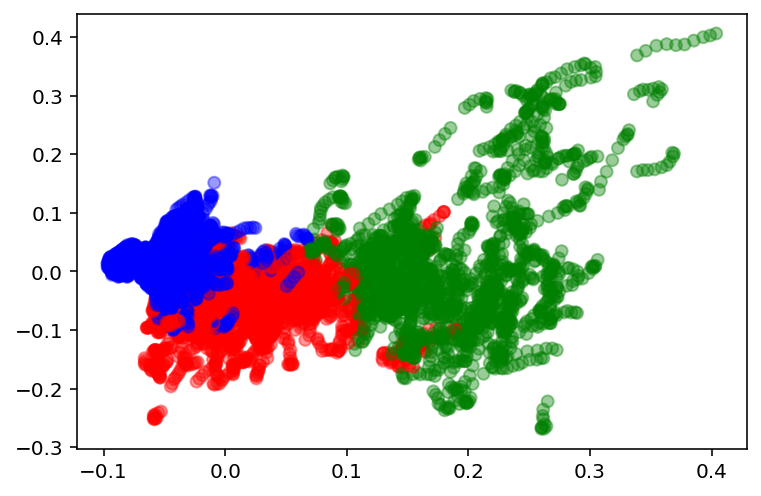

In [39]:
# plot the PCA components
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

In [79]:
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [80]:
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [81]:
tot = sum(eigen_vals)
# var_exp ratio is fraction of eigen_val to total sum
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# calculate the cumulative sum of explained variances
cum_var_exp = np.cumsum(var_exp)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

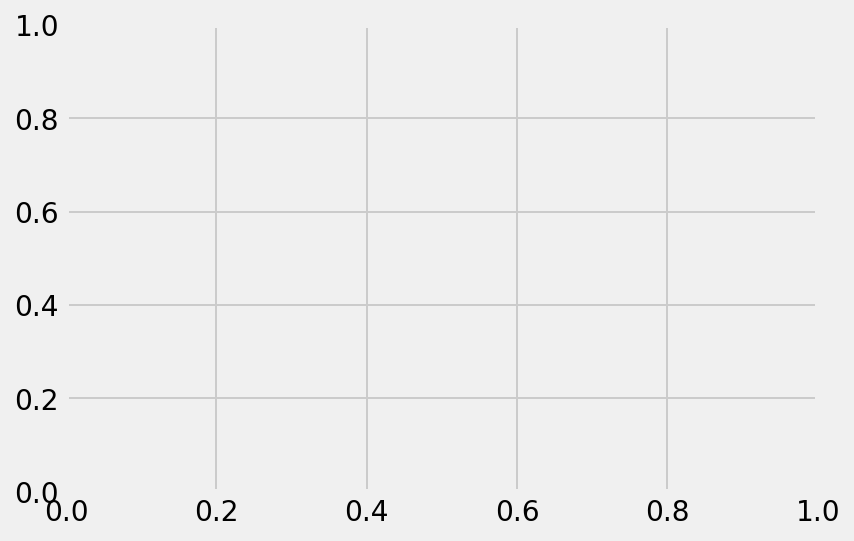

In [82]:
import matplotlib.pyplot as plt

plt.bar(range(1, 18), var_exp, alpha=0.75, align='center',
        label='individual explained variance')
plt.step(range(1, 18), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylim(0, 1.1)
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # PCA with 2 primary components
pca_3 = PCA(n_components=3) #PCA with 3 primary components

# fit and transform both PCA models
X_pca = pca.fit_transform(X_std)
X_pca_3 = pca_3.fit_transform(X_std)

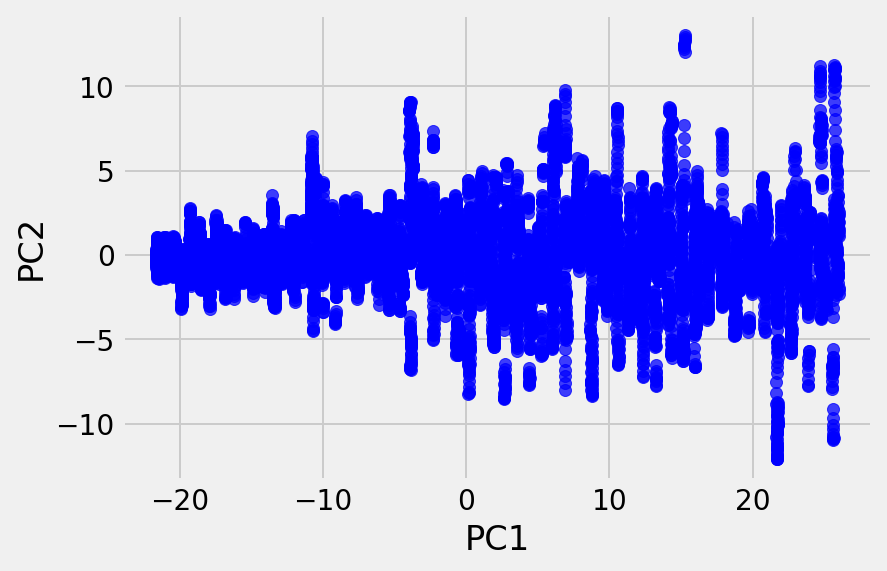

In [84]:
plt.scatter(X_pca.T[0], X_pca.T[1], alpha=0.75, c='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

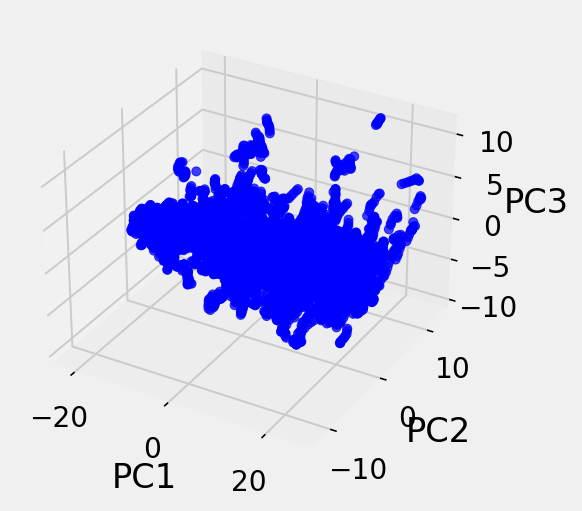

In [85]:
from mpl_toolkits.mplot3d import Axes3D

# initialize figure and 3d projection for the PC3 data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# assign x,y,z coordinates from PC1, PC2 & PC3
xs = X_pca_3.T[0]
ys = X_pca_3.T[1]
zs = X_pca_3.T[2]

# initialize scatter plot and label axes
ax.scatter(xs, ys, zs, alpha=0.75, c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

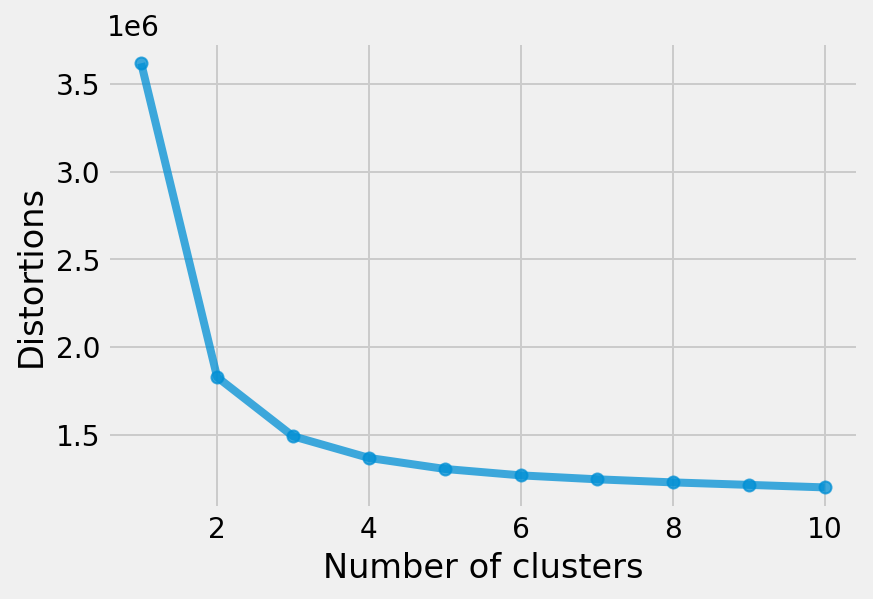

In [86]:
distortions = [] # sum of squared error within the each cluster
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X_std)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o', alpha=0.75)
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [87]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)

y_km = km.fit_predict(X_pca)

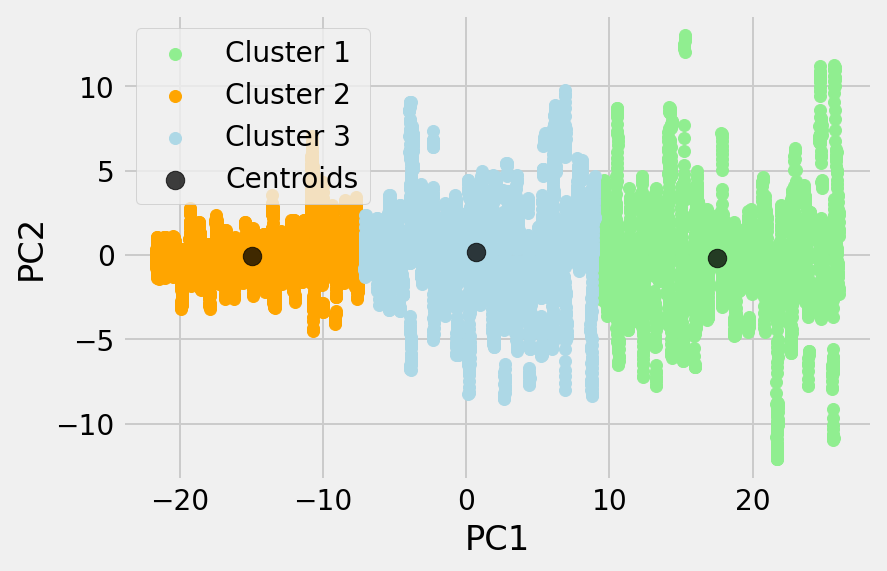

In [88]:
plt.scatter(X_pca[y_km==0, 0],
           X_pca[y_km==0, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_km==1, 0],
           X_pca[y_km==1, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_km==2, 0],
           X_pca[y_km==2, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=85,
           alpha=0.75,
           marker='o',
           c='black',
           label='Centroids')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [99]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.9,
             min_samples=75)

y_dbs = dbs.fit_predict(X_pca)


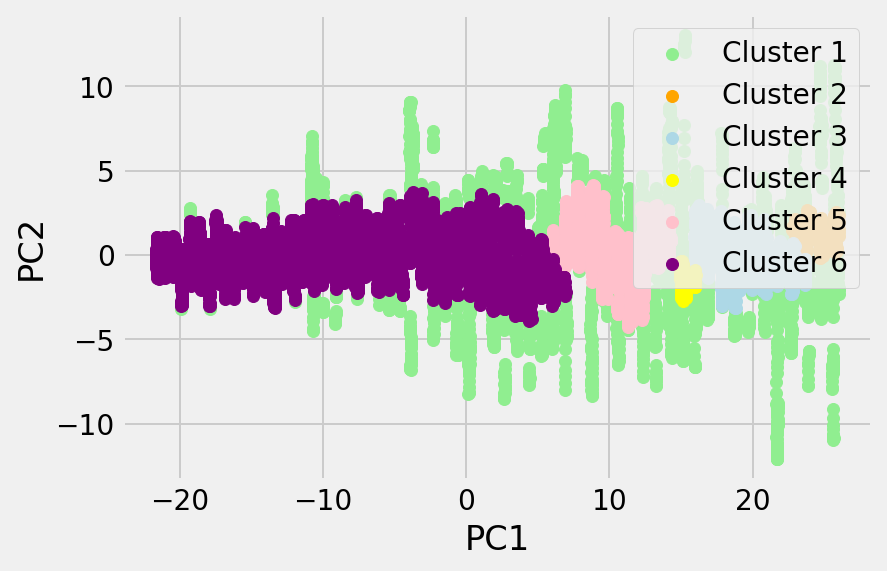

In [100]:
plt.scatter(X_pca[y_dbs==-1, 0],
           X_pca[y_dbs==-1, 1],
           c='lightgreen',
           label='Cluster 1')
plt.scatter(X_pca[y_dbs==0, 0],
           X_pca[y_dbs==0, 1],
           c='orange',
           label='Cluster 2')
plt.scatter(X_pca[y_dbs==1, 0],
           X_pca[y_dbs==1, 1],
           c='lightblue',
           label='Cluster 3')
plt.scatter(X_pca[y_dbs==2, 0],
           X_pca[y_dbs==2, 1],
           c='yellow',
           label='Cluster 4')
plt.scatter(X_pca[y_dbs==3, 0],
           X_pca[y_dbs==3, 1],
           c='pink',
           label='Cluster 5')
plt.scatter(X_pca[y_dbs==4, 0],
           X_pca[y_dbs==4, 1],
           c='purple',
           label='Cluster 6')

plt.legend(loc='best')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
